In [ ]:
#importing all modules 

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer #for vectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords #for removing stop words
STOPWORDS = set(stopwords.words('english'))

In [2]:
vocab_size = 5000         #declaring parameters
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [3]:
articles = []  #articles is for storing text
labels = []    #store the corresponding like politics,tech etc.,
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [4]:
train_size = int(len(articles) * training_portion)   #splitting into training and testing data
train_articles = articles[0: train_size]             #splitting ratio of 80:20
train_labels = labels[0: train_size]
validation_articles = articles[train_size:]
validation_labels = labels[train_size:]
print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [5]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)  #tokenizing the text into different and unique words
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [6]:
train_sequences = tokenizer.texts_to_sequences(train_articles) #rnn alg can understand only the sequences
print(train_sequences[10])

[2431, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1664, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1144, 1695, 1, 1722, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4515, 1, 2, 2873, 1505, 352, 4740, 1, 52, 341, 1, 352, 2171, 3962, 41, 22, 3796, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4741, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3665, 682, 3533, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1695, 1021, 1, 4998, 807, 1865, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1607, 4999, 543, 492, 1, 1443, 4742, 778, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1506, 22, 479, 1, 1, 1667, 1, 797, 1, 3066, 1, 1364, 6, 1, 2431, 565, 22, 2970, 4736, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 4303, 247]


In [7]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))                   #padding i.e., adding null values infront of a no. for easy comparison
print(len(train_sequences[1]))
print(len(train_padded[1]))
print(len(train_sequences[10]))
print(len(train_padded[10]))

426
200
192
200
186
200


In [8]:
print(train_padded[10])

[2431    1  225 4996   22  641  587  225 4996    1    1 1664    1    1
 2431   22  565    1    1  140  278    1  140  278  796  823  662 2307
    1 1144 1695    1 1722 4997    1    1    1    1    1 4739    1    1
  122 4515    1    2 2873 1505  352 4740    1   52  341    1  352 2171
 3962   41   22 3796    1    1    1    1  543    1    1    1  835  631
 2366  347 4741    1  365   22    1  787 2367    1 4302  138   10    1
 3665  682 3533    1   22    1  414  823  662    1   90   13  633    1
  225 4996    1  599    1 1695 1021    1 4998  807 1865  117    1    1
    1 2973   22    1   99  278    1 1607 4999  543  492    1 1443 4742
  778 1320    1 1862   10   33  641  319    1   62  478  565  301 1506
   22  479    1    1 1667    1  797    1 3066    1 1364    6    1 2431
  565   22 2970 4736    1    1    1    1    1  850   39 1826  675  297
   26  979    1  882   22  361   22   13  301 1506 1342  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

In [9]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)     #sequencing and padding for test data
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(validation_sequences))
print(validation_padded.shape)                     

445
(445, 200)


In [10]:
label_tokenizer = Tokenizer()                  #tokenizing and converting the labels into numbers
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)
print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  #in english many words are there 
# each a no. initially in the format of dictionary 
def decode_article(text):    #tokenized words in article will be converted to no.
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim),  #declaration of RNN model 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),             #defining layers of neurons with respective activation functions
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(set(labels))  #how many unique labels or categories 

{'business', 'tech', 'politics', 'sport', 'entertainment'}


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #fitting and training our model
num_epochs = 10 #how many times to run
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 7s - loss: 1.5979 - accuracy: 0.2904 - val_loss: 1.4323 - val_accuracy: 0.3978
Epoch 2/10
56/56 - 6s - loss: 0.9550 - accuracy: 0.6657 - val_loss: 0.5802 - val_accuracy: 0.8584
Epoch 3/10
56/56 - 7s - loss: 0.2862 - accuracy: 0.9393 - val_loss: 0.3547 - val_accuracy: 0.8899
Epoch 4/10
56/56 - 6s - loss: 0.0721 - accuracy: 0.9798 - val_loss: 0.2270 - val_accuracy: 0.9303
Epoch 5/10
56/56 - 8s - loss: 0.0582 - accuracy: 0.9854 - val_loss: 0.2818 - val_accuracy: 0.8899
Epoch 6/10
56/56 - 8s - loss: 0.0366 - accuracy: 0.9910 - val_loss: 0.2188 - val_accuracy: 0.9281
Epoch 7/10
56/56 - 8s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2322 - val_accuracy: 0.9281
Epoch 8/10
56/56 - 11s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2429 - val_accuracy: 0.9303
Epoch 9/10
56/56 - 10s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2502 - val_accuracy: 0.9371
Epoch 10/10
56/56 - 7s - loss: 7.6746e-04 - accuracy: 1.0000 - val_loss: 0.2593 - val_accuracy: 0.9393


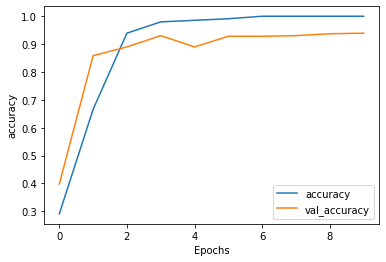

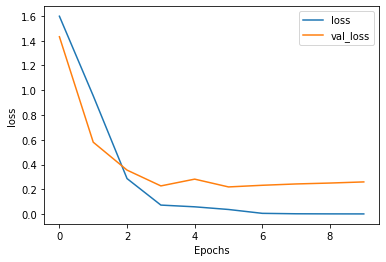

In [15]:
from matplotlib import pyplot as plt
#comparison between test accuracy and trainng accuracy
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
model.save('model.h5')   #saving the model


TypeError: can't pickle _thread.RLock objects